In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, read_csv
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Section 1: Metadata

In [2]:
## Load metadata.
metadata = read_csv(os.path.join('data', 'metadata.csv'))

## Apply rejections.
reject = read_csv(os.path.join('data', 'reject.csv'))
metadata = metadata[metadata.subject.isin(reject.query('reject == 0').subject)].reset_index(drop=True)

#### 1.1 Gender composition

In [3]:
## Describe gender composition.
metadata.groupby('gender').age.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,147.0,33.0,13.1,18.0,23.0,29.0,41.0,70.0
Male,138.0,38.0,13.2,18.0,28.0,36.0,46.8,76.0
Other,13.0,27.5,6.5,19.0,22.0,26.0,30.0,39.0
Rather not say,2.0,25.5,3.5,23.0,24.2,25.5,26.8,28.0


#### 1.2 Race / ethnicity

In [4]:
## Describe race endorsement.
metadata.race.value_counts()

['White']                                                 226
['Asian']                                                  27
['Black or African American']                              26
['Rather not say']                                          8
['Asian', 'White']                                          7
['Asian', 'Black or African American']                      2
['Native Hawaiian or other Pacific Islander', 'White']      1
['American Indian/Alaska Native']                           1
['American Indian/Alaska Native', 'White']                  1
['Black or African American', 'White']                      1
Name: race, dtype: int64

#### 1.3 Education

In [5]:
## Describe education endorsement.
metadata.education.value_counts()

Bachelor degree            121
Some college                74
Master degree or higher     45
High school                 31
Associate degree            26
Less than high school        2
Rather not say               1
Name: education, dtype: int64

#### 1.4 Timing

In [6]:
## Load metadata.
timing = read_csv(os.path.join('data', 'timing.csv'))

## Apply rejections.
reject = read_csv(os.path.join('data', 'reject.csv'))
timing = timing[timing.subject.isin(reject.query('reject == 0').subject)].reset_index(drop=True)

## Describe task timing.
timing.filter(regex='_t').describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
mars_total,300.0,270.7,152.7,117.0,198.6,247.8,301.7,2087.3
mars_task,300.0,174.2,54.0,52.6,133.7,173.7,212.5,297.1
rpm_total,300.0,171.0,123.2,43.4,126.8,158.9,186.8,1747.6
rpm_task,300.0,124.6,40.1,18.6,97.9,127.2,151.0,243.1


## Progressive Matrices

In [7]:
## Load data.
mars = read_csv(os.path.join('data', 'mars.csv'))
rpm  = read_csv(os.path.join('data', 'rpm.csv'))

## Apply rejections.
mars = mars[mars.subject.isin(reject.query('reject == 0').subject)].reset_index(drop=True)
rpm  = rpm[rpm.subject.isin(reject.query('reject == 0').subject)].reset_index(drop=True)

## Handle missing responses.
mars = mars.fillna(0)
rpm  = rpm.fillna(0)

## Define sum scores.
scores = DataFrame(dict(
    subject = mars.subject.unique(),
    short_form = mars.groupby('subject').short_form.mean().astype(int).values,
    mars = mars.groupby('subject').accuracy.sum().astype(int).values,
    rpm = rpm.groupby('subject').accuracy.sum().astype(int).values,
))

#### 2.1 MARS Scores

In [8]:
## Describe score distributions.
scores.groupby('short_form').mars.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
short_form,,,,,,,,
1,103.0,7.9,2.4,2.0,7.0,8.0,10.0,12.0
2,98.0,8.2,2.6,1.0,7.0,9.0,10.0,12.0
3,99.0,7.9,2.7,1.0,6.0,8.0,10.0,12.0


#### 2.2 RPM Scores

In [9]:
## Describe score distributions.
scores.groupby('short_form').rpm.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
short_form,,,,,,,,
1,103.0,4.8,1.9,0.0,4.0,5.0,6.0,8.0
2,98.0,4.3,1.9,0.0,3.0,4.0,6.0,9.0
3,99.0,4.4,2.0,0.0,3.0,4.0,6.0,9.0


#### 2.3 Correlation

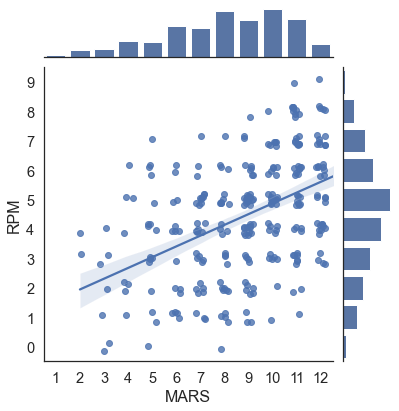

In [10]:
## Initialize canvas.
g = sns.JointGrid(data=scores, x='mars', y='rpm')

## Plot scores.
g.plot_joint(sns.regplot, x_jitter=0.2, y_jitter=0.2)
g.plot_marginals(sns.countplot, color='#4c72b0')

## Add detail.
g.ax_joint.invert_yaxis()
g.ax_joint.set(xlabel='MARS', ylabel='RPM');

In [11]:
scores.groupby('short_form').corr(method='spearman')

mars       rpm
short_form                         
1          mars  1.000000  0.574429
           rpm   0.574429  1.000000
2          mars  1.000000  0.402059
           rpm   0.402059  1.000000
3          mars  1.000000  0.480258
           rpm   0.480258  1.000000

## Section 3: Self-Report Data

In [12]:
## Load metadata.
surveys = read_csv(os.path.join('data', 'surveys.csv'))

## Apply rejections.
reject = read_csv(os.path.join('data', 'reject.csv'))
surveys = surveys[surveys.subject.isin(reject.query('reject == 0').subject)].reset_index(drop=True)

## Compute sum scores.
scores['nfc10'] = surveys.filter(regex='nfc10_q').values[:,:-1].sum(axis=1)
scores['pcf'] = surveys.filter(regex='pcf_q').values[:,:-1].sum(axis=1)
scores['sns'] = surveys.filter(regex='sns_q').values[:,:-1].sum(axis=1)

#### 3.1 Score distributiosn

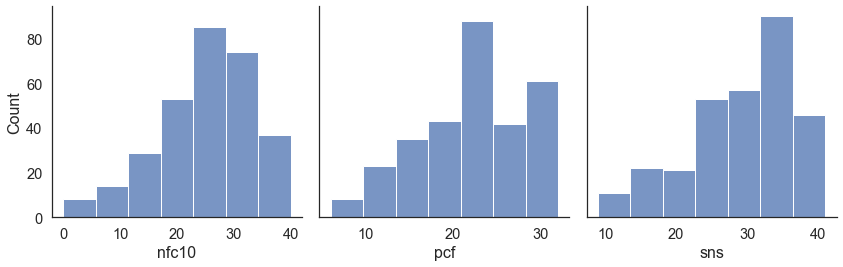

In [13]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4),sharey=True)

## Plot distributions.
sns.histplot(x=scores.nfc10, bins=7, ax=axes[0])
sns.histplot(x=scores.pcf, bins=7, ax=axes[1])
sns.histplot(x=scores.sns, bins=7, ax=axes[2])

sns.despine()
plt.tight_layout()

#### 3.2 Score correlations

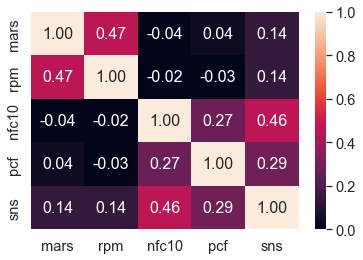

In [14]:
## Compute correlations.
corr = scores.drop(columns='short_form').corr(method='spearman')

## Plot correlations.
sns.heatmap(corr, vmin=0, vmax=1, annot=True, fmt='0.2f');